##Exploritory Data Analysis (EDA)

## Step1: Basic Statistics

### Explore Unique Values

In [ ]:
# Display unique values per column
print("\nUnique Values in Each Column:")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")


Unique Values in Each Column:
User ID: 19 unique values
Venue ID: 488 unique values
Latitude: 453 unique values
Longitude: 456 unique values
Check-in Time: 806 unique values
Day: 7 unique values
Previous Venue ID: 478 unique values
Venue Name: 402 unique values
Venue Category: 13 unique values


## Step 2: Temporal Analysis (Daily, Hourly, and Monthly Check-ins)

### 2.1 Check-in Distribution by Hour

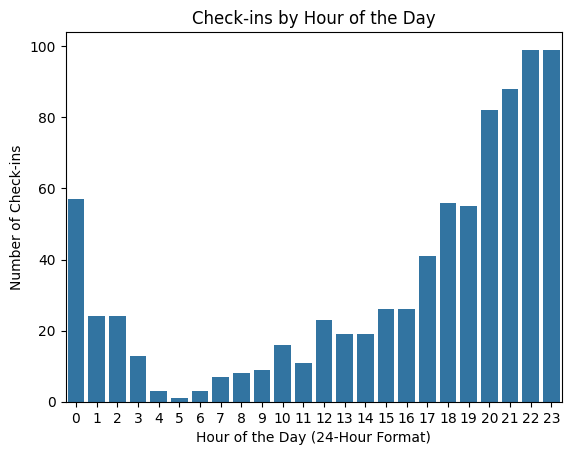

In [ ]:
df.loc[:, 'Hour'] = df['Check-in Time'].dt.hour
df = df.copy()
# Extract month name from the check-in time
df['Hour'] = df['Check-in Time'].dt.hour

# Plot check-ins by month
sns.countplot(data=df, x='Hour', legend=False)
plt.title("Check-ins by Hour of the Day")
plt.xlabel("Hour of the Day (24-Hour Format)")
plt.ylabel("Number of Check-ins")
plt.show()

### 2.2 Check-in Distribution by Day

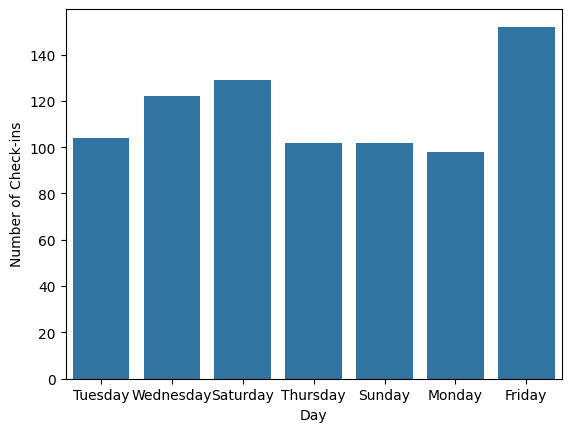

In [ ]:
# Plot check-ins by day of the week
sns.countplot(data=df, x='Day')
plt.xlabel("Day")
plt.ylabel("Number of Check-ins")
plt.show()

### 2.3 Check-in Distribution by Month

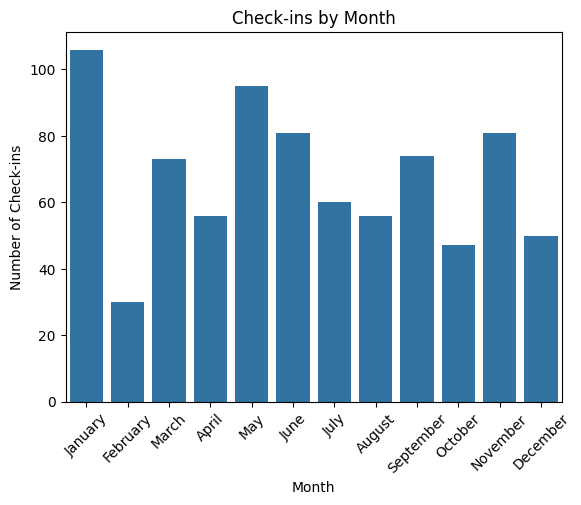

In [ ]:
df.loc[:, 'Month'] = df['Check-in Time'].dt.month_name()
df = df.copy()
# Extract month name from the check-in time
df['Month'] = df['Check-in Time'].dt.month_name()

# Plot check-ins by month
sns.countplot(data=df, x='Month', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Check-ins by Month")
plt.xlabel("Month")
plt.ylabel("Number of Check-ins")
plt.xticks(rotation=45)
plt.show()


> ## **Observation: Temporal Analysis (Daily, Hourly, and Monthly Check-ins)**
- The temporal analysis of check-ins across different times highlights important behavioral patterns in user activity:
  - **Hourly Check-ins:**
      Users are most active between (6 PM and 10 PM), suggesting that this time window is ideal for promoting evening-specific recommendations, such as dining or entertainment venues.
      A small spike in check-ins around midnight may be attributed to late-night outings, emphasizing the importance of 24-hour service venues or nightlife options.
  - **Daily Check-ins:**   **Fridays** experience the highest check-ins,
      indicating that weekends,especially the first day of the weekend, play a crucial role in user activity. Consistent engagement during weekdays suggests users also check in frequently during workdays, possibly for lunch breaks or after-work visits.
  - **Monthly Check-ins:**   **January** and **May** show peak check-in activity, possibly due to seasonal  events, holidays, or favorable weather. Other months exhibit relatively stable check-in rates, indicating that users maintain consistent engagement throughout the year, except for a few peaks.

  

## Step 3: Geospatial Analysis

### 3.1 Scatter Plot of Venue Locations (Clusters):

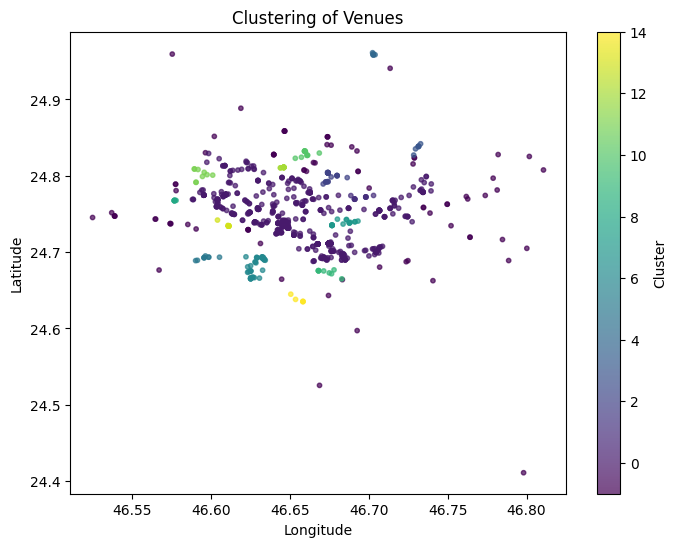

In [ ]:
# Clustering on latitude and longitude
coords = df[['Latitude', 'Longitude']].to_numpy()
dbscan = DBSCAN(eps=0.01, min_samples=5).fit(coords)

# Assign cluster labels to the dataset
df['Cluster'] = dbscan.labels_

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=10, alpha=0.7)
plt.title("Clustering of Venues")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Cluster")
plt.show()


### 3.2 Interactive Map Visualization (Venue Categories):

In [ ]:
# Get unique categories and generate a colormap
categories = df['Venue Category'].unique()
colormap = cm.get_cmap('tab20', len(categories))
color_mapping = {category: colors.to_hex(colormap(i)) for i, category in enumerate(categories)}

# Initialize the map
map_center = [24.7136, 46.6753]
category_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for venues with colors based on category
for idx, row in df.iterrows():
    category = row['Venue Category']
    color = color_mapping[category]

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.8,
        popup=f"Venue: {row['Venue Name']}<br>Category: {category}"
    ).add_to(category_map)

# Display the map
category_map

<ipython-input-49-d596797ddbc8>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', len(categories))


> ## **Observation: Geospatial Analysis**
  - **Clustering of Venues:**
      The clustering output indicates distinct clusters of venues based on latitude and longitude, suggesting areas with varying concentrations of user activity and venue density. Some smaller clusters in the outer regions highlight less frequently visited areas, which could be useful for identifying niche or emerging POIs.
      A significant number of venues are grouped into one or two dominant clusters (purple and teal), indicating central or popular zones for activities.
  - **Interactive Map Visualization:**   The interactive map highlights that venue categories like restaurants, coffee shops, and entertainment centers are densely concentrated in the central urban area, while parks and recreational venues are more dispersed around the outskirts.
  This spatial distribution indicates a user behavior pattern where check-ins are primarily centered around urban entertainment and dining venues, with occasional visits to peripheral locations like parks.



## Step 4: Venue Category Analysis

###  4.1 Top 10 venue categories

<ipython-input-50-76f122e759cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')


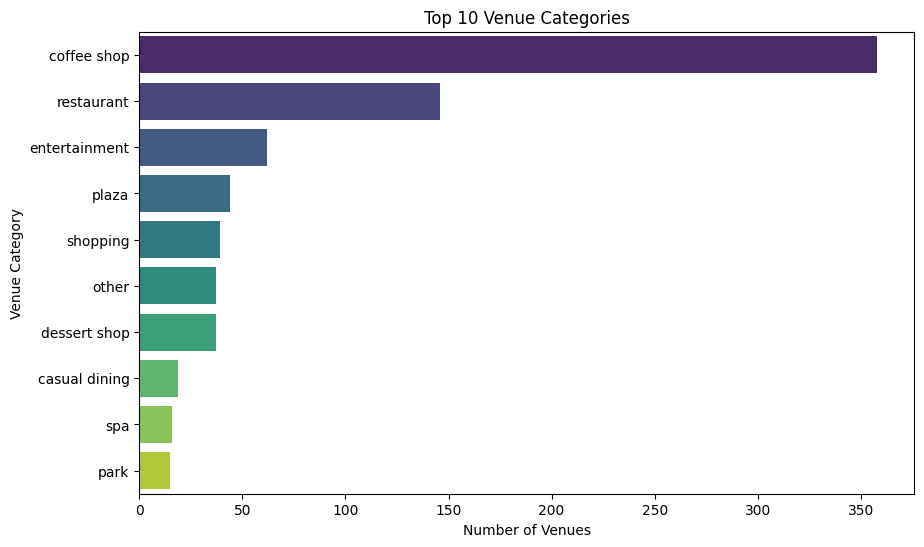

In [ ]:
# Get the top 10 venue categories by count
top_10_categories = df['Venue Category'].value_counts().head(10)

# Plot the top 10 venue categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis')
plt.title("Top 10 Venue Categories")
plt.xlabel("Number of Venues")
plt.ylabel("Venue Category")
plt.show()

### 4.2 Explore category diversity for users

<ipython-input-51-2f603b391db4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_diversity.index, y=category_diversity.values, palette='viridis')


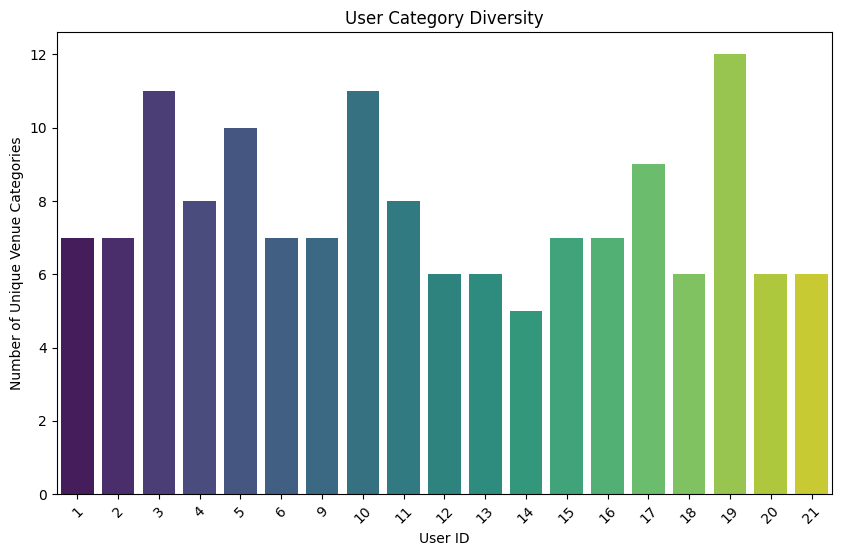

In [ ]:
# Group by 'User ID' and count unique venue categories visited
category_diversity = df.groupby('User ID')['Venue Category'].nunique().sort_values(ascending=False)

# Visualize the diversity using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_diversity.index, y=category_diversity.values, palette='viridis')
plt.title("User Category Diversity")
plt.xlabel("User ID")
plt.ylabel("Number of Unique Venue Categories")
plt.xticks(rotation=45)
plt.show()


> ## **Observation: Venue Category Analysis**
  - **Top 10 Venue Categories:**
      - The most frequently visited venue categories indicate that coffee shops and restaurants dominate user preferences, followed by entertainment venues, plazas, and shopping centers.
      - This trend suggests that users commonly engage in food, beverage, and social activities, while also balancing leisure and retail exploration.
      The inclusion of spas, casual dining, and dessert shops highlights interest in relaxation and lifestyle-based venues.
  - **User Category Diversity:**   
  Users demonstrate varying levels of category exploration:
    - Some users exhibit high diversity (10-12 categories), indicating broad preferences across multiple venue types.
    - Others show low diversity (4-6 categories), suggesting consistent, repetitive visits to specific venue types like coffee shops or restaurants.

  








## Step 5: User Behavior Analysis

### 5.1 Top 10 users by check-ins

<ipython-input-52-87a3daba00eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users.index, y=top_10_users.values, palette='plasma', edgecolor='black')


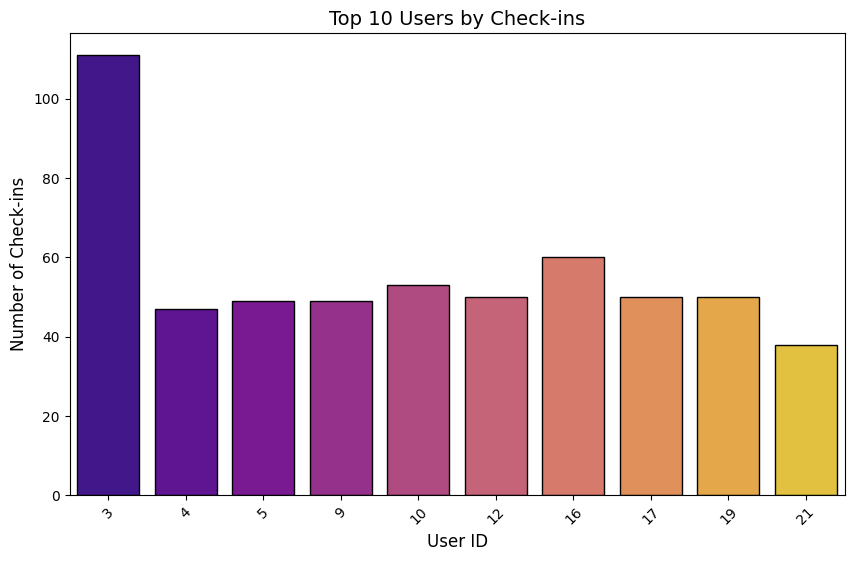

In [ ]:
# Group by 'User ID' and count total check-ins
user_checkins = df.groupby('User ID').size().sort_values(ascending=False)

# Select the top 10 users by check-ins
top_10_users = user_checkins.head(10)

# Visualize using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_users.index, y=top_10_users.values, palette='plasma', edgecolor='black')

# Labeling
plt.title("Top 10 Users by Check-ins", fontsize=14)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Number of Check-ins", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 5.2 Display most frequent venue transitions

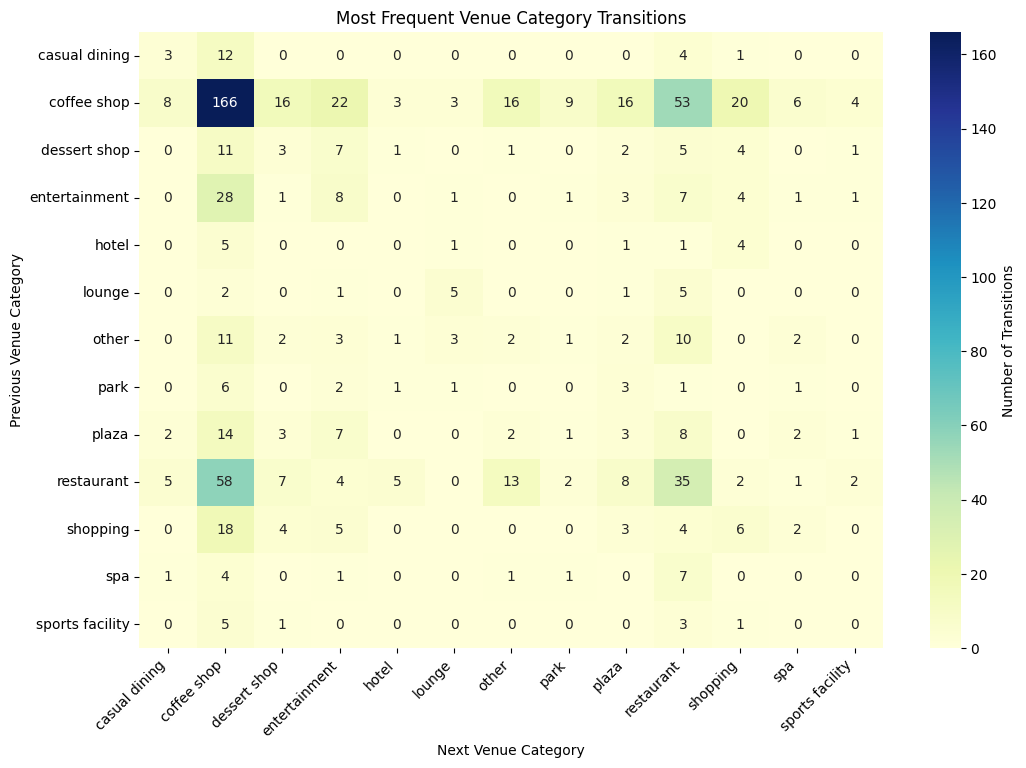

In [ ]:
# Group by category transitions and count occurrences
category_transitions = (
    df.groupby(['Previous Venue Category', 'Next Venue Category'])
    .size()
    .reset_index(name='Count')
)

# Pivot the table for the heatmap
category_transition_pivot = category_transitions.pivot(
    index='Previous Venue Category',
    columns='Next Venue Category',
    values='Count'
).fillna(0)  # Fill missing values with 0

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_transition_pivot, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Number of Transitions'})
plt.title('Most Frequent Venue Category Transitions')
plt.xlabel('Next Venue Category')
plt.ylabel('Previous Venue Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


> ## **Observation: User Behavior Analysis**

  - **Top 10 Users by Check-ins:**
  
  The bar chart shows that User ID 3 leads with over 100 check-ins, followed by User IDs 10, 16, and 12, each with significant activity, ranging between 60 and 80 check-ins. The rest of the top 10 users display moderate engagement. This distribution reveals a core set of highly active users and others with sporadic but valuable contributions.

  - **Most Frequent Venue Category Transitions:**  
  The heatmap highlights that the most common transitions occur within coffee shops (166 self-transitions), indicating frequent revisit behavior. Notable transitions also include restaurants to coffee shops (58 transitions), as weel as coffee shops to restaurants (53 transitions), also plazas to coffee shops (14 transitions). These frequent paths suggest common user behavior patterns, such as dining followed by coffee visits or shopping.

